# Bibliotecas Utilizadas

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from torchvision import datasets
from torchvision import transforms


# bibliotecas para convolução
from scipy.signal import convolve

# Introdução

> Em matemática, particularmente na área de análise funcional e processamento do sinal, convolução é um operador linear que, a partir de duas funções dadas, f(x) e g(x), resulta numa terceira h(x) que mede a soma do produto dessas funções ao longo da região subentendida pela superposição delas em função do deslocamento existente entre elas. 


> Para ler mais sobre consulte a fonte: https://pt.wikipedia.org/wiki/Convolu%C3%A7%C3%A3o

<img width='700px' src='imgs/convolucao.PNG'>

# Convolução 1D

> Para começarmos a entender a convolução vamos começar com o caso mais simples e compreender a importância do kernel e como ele é aplicado na camada de convolução. No caso da convolução 1D em engenharia ela é muito utilizada para problemas com acelerômetro, dentre outros. 

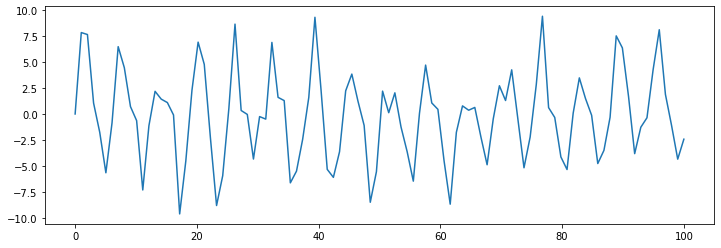

In [3]:
# sinal de entrada
x = np.linspace(0,100,100)
y = 10*np.sin(x)*np.random.rand(x.shape[0]) #função seno + ruído 
plt.figure(figsize=(12,4))
plt.plot(x,y)

In [4]:
# função para plotar uma imagem contendo degrade  
def show(valores,title):
  plt.figure(figsize=(len(valores),2))
  plt.imshow(valores[np.newaxis,:],cmap='gray')
  for k, s in enumerate(valores):
    plt.text(k,0,'{:.1f}'.format(s),fontsize=16,color='red',ha='center',va='center')
  plt.title(title,fontsize=18)
  plt.yticks([])

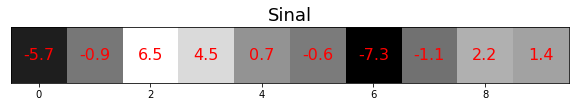

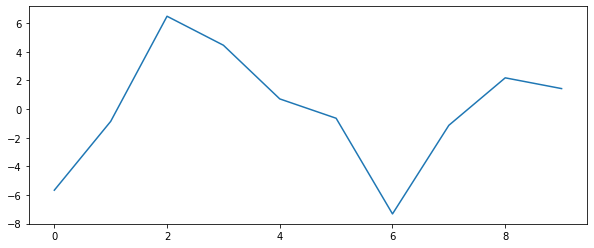

In [8]:
# utilizando uma parte dos sinais de entrada
sinal = y[5:15]
show(sinal,'Sinal')        # plotando o degrade
plt.figure(figsize=(10,4)) # plotando o grafico 
ax = plt.plot(sinal)
ax = ax

# O que é um Kernel 

Retomando o que já aprendemos
* **Kernels** são filtros convolucionais. Na prática são arrays n-dimensionais que são operados com o dado através da convolução.
* Os **pesos do kernel**, ou seja, os elementos do array, carregam o padrão que será procurado no dado original.

Esses filtros podem ser manualmente projetados se já sabemos o padrão que queremos procurar, ou o mapa de ativação desejado. A seguir vamos conhecer alguns kernels convolucionais e a intuição por trás do padrão que eles projetam.

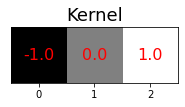

In [10]:
# criando um kernel
kernel = np.asarray([1,0,-1])      #kernel decrescente
kernel_invertido = np.flip(kernel) #kernel crescente
show(kernel_invertido,'Kernel')

# Aplicando Convolução 1D 

> Agora que temos um kernel já implementado vamos aplicar a convolução desse kernel sobre nosso sinal de entrada. O resultado de uma operação de convolução entre duas funções é dito como **mapa de ativação***.


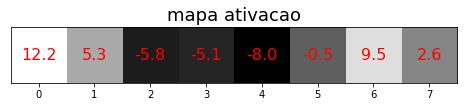

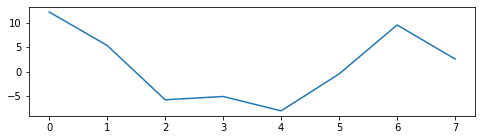

In [14]:
# realizando a convolução
mapa_ativacao = convolve(sinal,kernel,mode='valid')
show(mapa_ativacao,'mapa ativacao')

# plotando visualmente
plt.figure(figsize=(8,2))
ax = plt.plot(mapa_ativacao)
ax = ax

> Como podemos ver, para regiões onde o gradiente da função é maior, o mapa de ativação mostra regiões "brancas". Já para onde o gradiente da função é menor, os valores mostrados são "pretos".

### Sobrepondo o mapa de ativação ao trecho da função sinal (input)

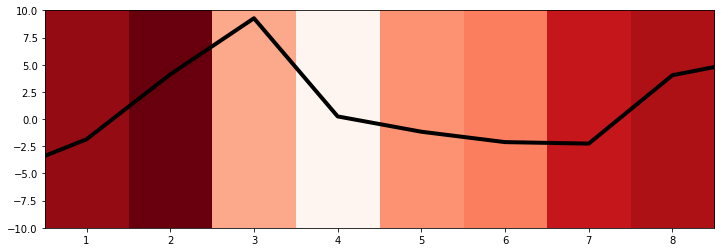

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(sinal,color='k',linewidth=4)
plt.imshow(ativacao[np.newaxis,:],cmap='Reds',aspect='auto',extent=(0.5,8.5,-10,10))

> Novamente como podemos ver nas regiões mais claras o kernel mapeia regiões de maiores crescimentos. Portanto, a etapa de convolução acentua certas características do seu sinal de entrada. 

> A seguir vamos aplicar a convolução a todo a função senóide com ruído. Veja como ela cria um "filtro". Logo, em Redes Convolucionais cada kernel acentua características da imagem de entrada, como por exemplo, linhas verticais, linhas horizontais, circulos, triangulos, dentre outros. 

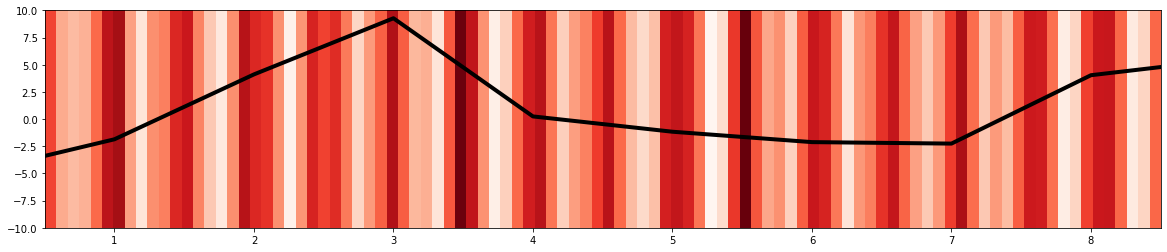

In [ ]:
ativacao = convolve(y,kernel,mode='valid')
plt.figure(figsize=(20,4))
plt.plot(sinal,color='k',linewidth=4)
plt.imshow(ativacao[np.newaxis,:],cmap='Reds',aspect='auto',extent=(0.5,8.5,-10,10))

# Convolução 2D

In [17]:
from skimage import io, color, transform, data
from scipy.signal import convolve
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# funcao plot de um kernel 2D
def show(valores,title):
  plt.figure(figsize=(len(valores),len(valores)))
  plt.imshow(valores,cmap='gray')
  for i, line in enumerate(valores):
    for j, col in enumerate(line):
      plt.text(j,i,'{:.0f}'.format(col), fontsize=16,color='red',ha='center',va='center')
  
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  # plt.savefig(title+'.png', format='png',dpi=100,bbox_inches='tight') # para quem quiser salvar o kernel

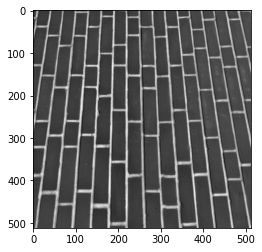

In [28]:
# importando uma imagem de uma biblioteca do scikit learn para utilizarmos como exemplo
img = data.brick() #parede de tijolos
ax = plt.imshow(img, cmap='gray')
ax = ax 

> A operação do kernel sobre dados 2D acontece do seguinte modo: 

<img width='700px' src='/content/imgs/convolucao2d.PNG'>

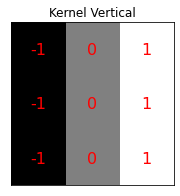

In [32]:
# kernel vertical 
# na convolução ele é invertido então é um kernel que verifica do branco para o preto. 
kernel_v = [[-1,0,1],[-1,0,1],[-1,0,1]]
show(kernel_v,'Kernel Vertical')

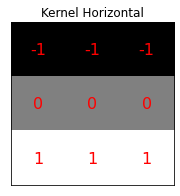

In [33]:
# kernel horizontal 
kernel_h = [[-1,-1,-1],[0,0,0],[1,1,1]]
show(kernel_h,'Kernel Horizontal')

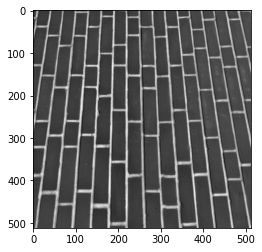

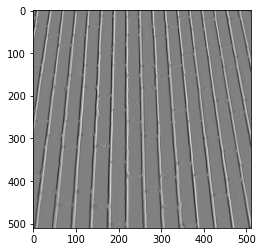

In [34]:
# aplicando o Kernel Vertical na imagem teremos
mapa_de_caracteristicas = convolve(img,kernel_v,mode='valid')
plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(mapa_de_caracteristicas,cmap='gray')

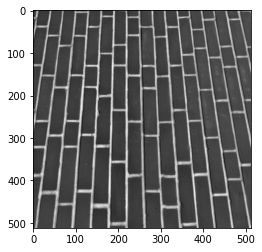

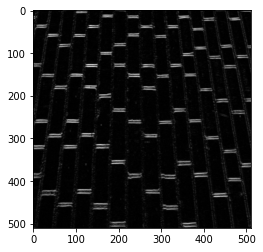

In [35]:
# aplicando o Kernel Horizontal na imagem teremos
mapa_de_caracteristicas_h = convolve(img,kernel_h,mode='valid')
plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(np.abs(mapa_de_caracteristicas_h),cmap='gray')

# Filtros Convolucionais


* Como foi dito os *Kernels** são filtros convolucionais. Esses filtros podem ser manualmente projetados se já sabemos o padrão que queremos procurar, ou o mapa de ativação desejado. A seguir vamos conhecer alguns kernels convolucionais e a intuição por trás do padrão que eles projetam.

* Aqui vamos estudar alguns filtros clássicos que foram desenvolvidos. 

In [36]:
def show(img, kernel, resultado, titulo):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  plot = [img, kernel, resultado]
  titulos = ['Imagem', titulo, 'Mapa de Ativação']
  for k, ax in enumerate(axs):
    ax.imshow(plot[k], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(titulos[k])

  for i, line in enumerate(kernel):
    for j, col in enumerate(line):
      axs[1].text(j, i, '{:.2f}'.format(col), fontsize=12, color='red', ha='center', va='center')

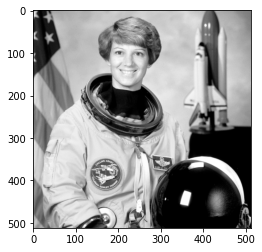

In [41]:
# importando imagem para analise dos filtros
img = data.astronaut() #astronauta
ax = plt.imshow(img, cmap='gray')
img = img[:,:,0] #selecionando só um canal de cor
plt.imshow(img, cmap='gray')
ax = ax 

## Filtro da Média

Ao aplicar este filtro a uma imagem, o mapa de ativação resultante será uma versão suavizada da imagem original (mais "borrada", menos nítida). Este efeito é alcançado explorando a operação de convolução para **tirar a média dos pixels** de subregiões da imagem.

Os pesos desse kernel são definidos para replicar a operação da média, ou seja, para um filtro $3 \times 3$ com 9 pesos, temos que: <br><br>
\begin{equation}
\frac{\sum_{x=1}^{9} p(x)}{9} = \sum_{x=1}^{9} \frac{1}{9} p(x)
\end{equation}

Vamos modelar dois filtros:
* $3 \times 3$, com todos os pesos iguais a $\frac{1}{3^2}$ 

* $9 \times 9$, com todos os pesos iguais a $\frac{1}{9^2}$

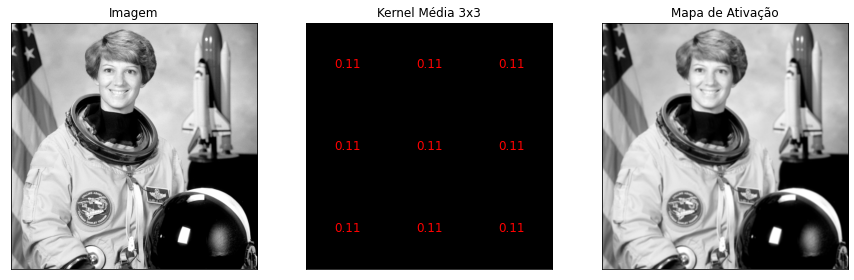

In [45]:
# kernel 3x3
    # a imagem será suavizada de forma suave
kernel_media = np.zeros((3,3))
kernel_media[:] = 1.0/(3**2)

resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel Média 3x3')

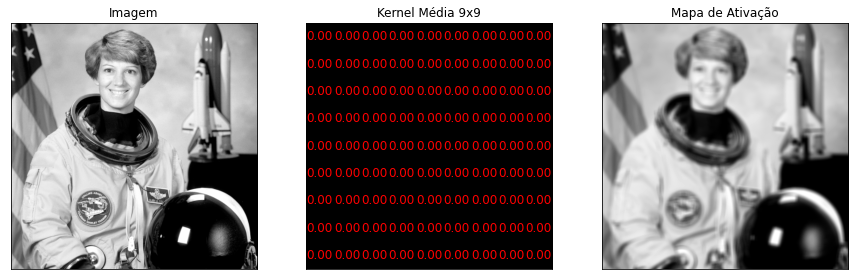

In [48]:
# kernel 9x9
    # a imagem será borrada de forma mais brusca
kernel_media = np.zeros((9,9))
kernel_media[:] = 1.0/(9**9)

resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel Média 9x9')

## Sobel 

Esse se parece muito com o filtro de bordas que já fizemos na aula passada, com a diferença que os vizinhos diretos do pixel central tem valor absoluto de maior intensidade (na horizontal ou na vertical, a depender da borda desejada).

> Após realizar a convolução, podemos imprimir os **valores absolutos** do mapa de ativação para visualizar as bordas independente do sinal da ativação.


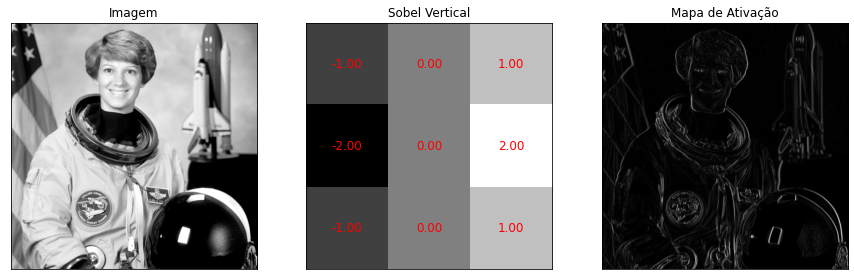

In [49]:
# Sobel Vertical
# referencia: https://pt.wikipedia.org/wiki/Filtro_Sobel

sobel_v = np.zeros((3,3))
sobel_v[:, 0] = -1
sobel_v[:, 2] = 1
sobel_v[1, [0, 2]] = [-2, 2]
# print(sobel_v)

resultado = convolve(img, sobel_v, mode='valid')
show(img, sobel_v, np.abs(resultado), 'Sobel Vertical')

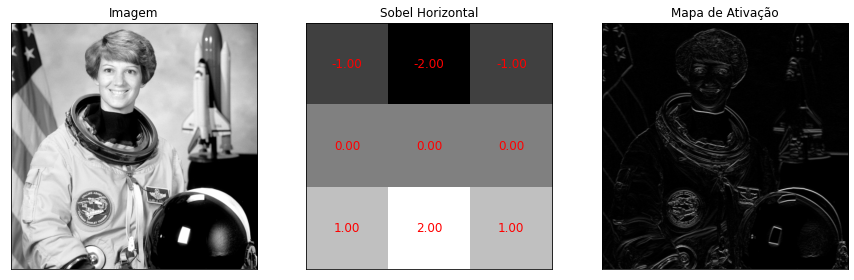

In [50]:
# Sobel Horizontal
sobel_h = np.zeros((3,3))
sobel_h[0, :] = -1
sobel_h[2, :] = 1
sobel_h[[0, 2], 1] = [-2, 2]
# print(sobel_h)

resultado = convolve(img, sobel_h, mode='valid')
show(img, sobel_h, np.abs(resultado), 'Sobel Horizontal')


## Laplace

Filtro utilizado para detecção de bordas, o Laplace. Diferente do Sobel, este filtro destaca igualmente bordas de diferentes direções.

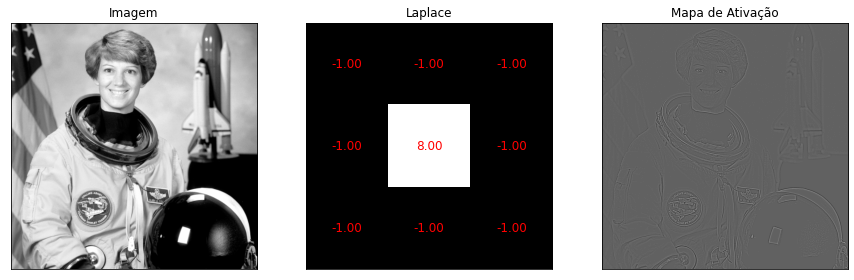

In [51]:
# Laplace
#referencia: https://en.wikipedia.org/wiki/Discrete_Laplace_operator | https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm

laplace = np.ones((3,3)) * -1
laplace[1,1] = 8
# print(laplace)

resultado = convolve(img, laplace, mode='valid')
show(img, laplace, --resultado, 'Laplace')

# Filtro para buscar padrão em imagem

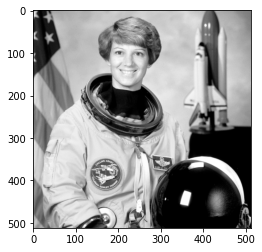

In [59]:
img = data.astronaut() #astronauta
ax = plt.imshow(img, cmap='gray')
img = img[:,:,0] #selecionando só um canal de cor
plt.imshow(img, cmap='gray')
ax = ax 

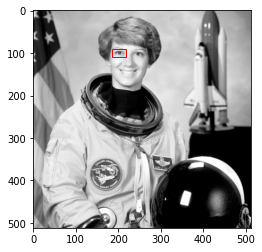

In [70]:
# criar um retangulo para localizar o olho 
retangulo = [90, 110, 185, 218]

# Imprime imagem e retangulo
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

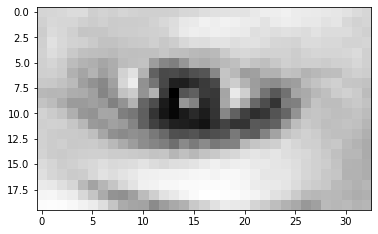

In [71]:
patch = img[retangulo[0]:retangulo[1], retangulo[2]:retangulo[3]]
patch = patch - patch.mean()
patch = np.flip(patch)

plt.imshow(patch, cmap='gray')

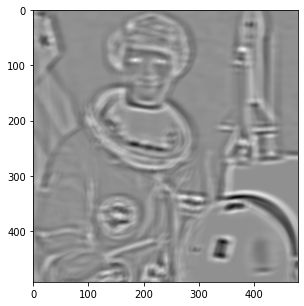

In [74]:
resultado = convolve(img, patch, mode='valid')

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(resultado, cmap='gray')
# ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
#                                (retangulo[3] - retangulo[2]),
#                                (retangulo[1] - retangulo[0]), color='red', fill=False))

Repare que na região dos olhos temos que o kernel conseguiu filtrar essa região selecionada. 